In [1]:
# Libraries

from PIL import Image
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from random import randint
from tensorflow.keras import datasets, layers, models
import os
from sklearn.metrics import accuracy_score

os.chdir('D:/Traffic_Sign_Recognition')

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


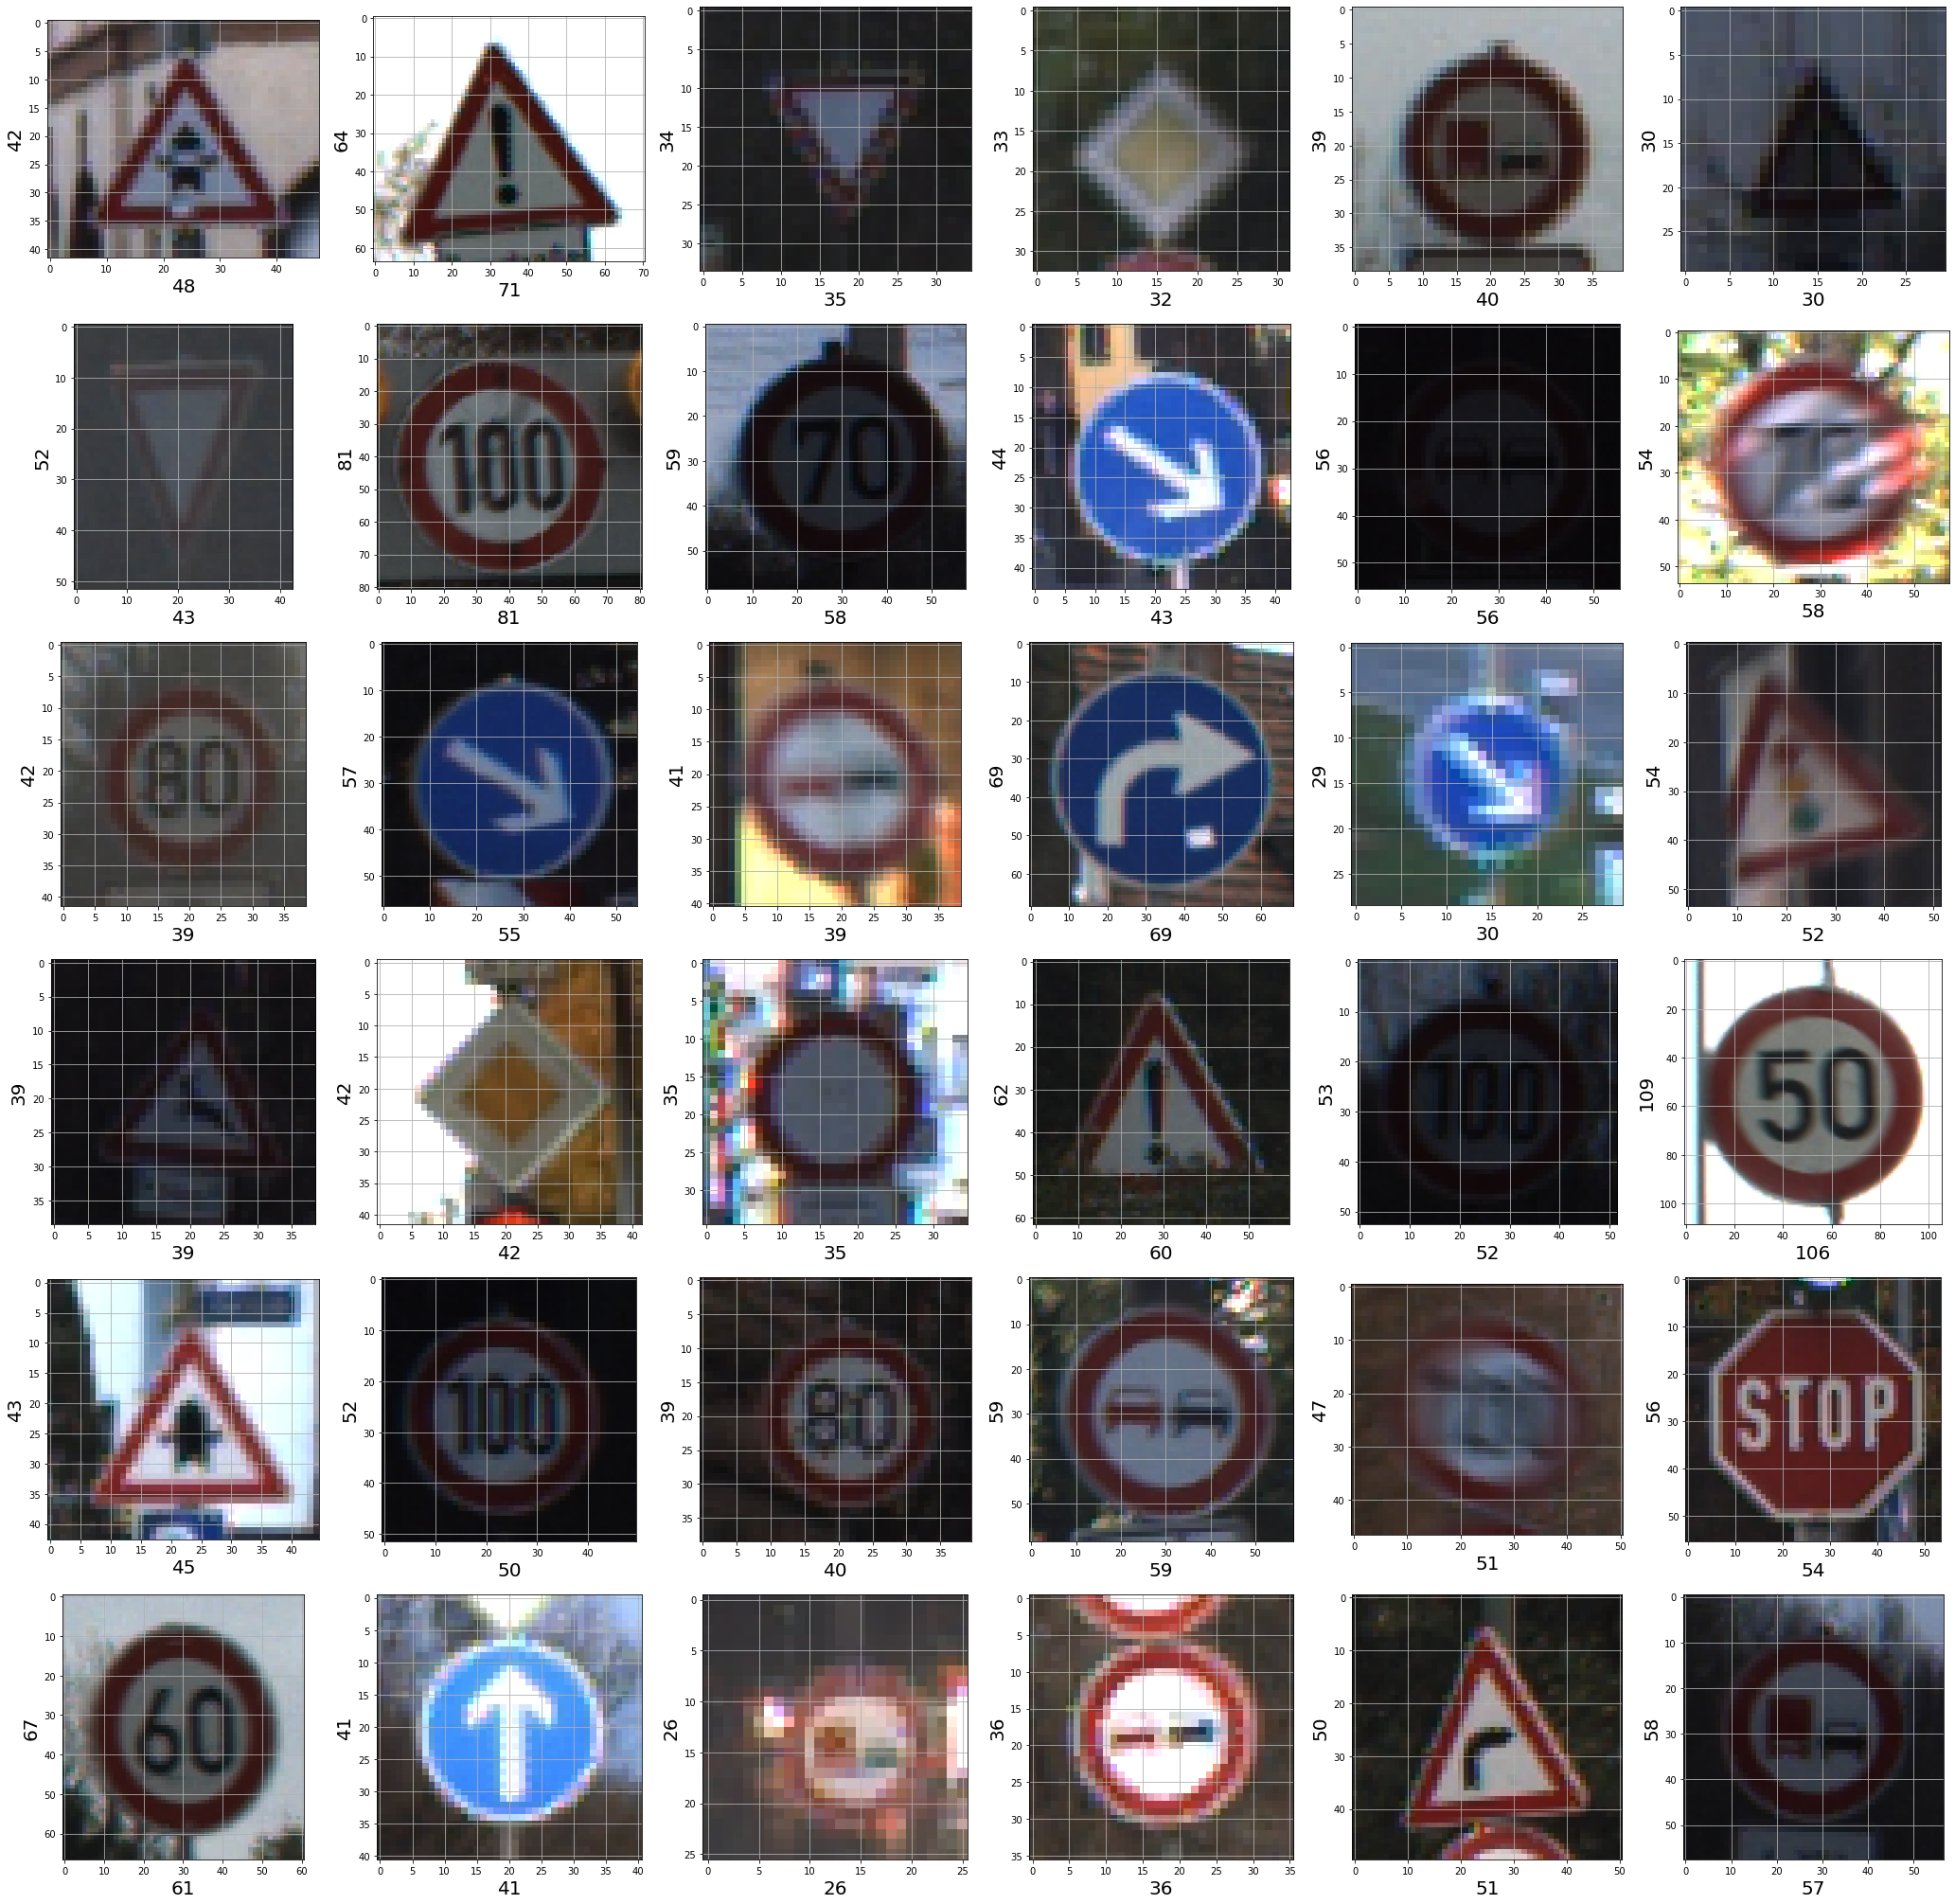

In [5]:
#  Printing Test Images 
import random
from matplotlib.image import imread

test = pd.read_csv('D:\Traffic_Sign_Recognition/Test.csv')
imgs = test["Path"].values
ls = test["ClassId"].values

plt.figure(figsize=(36,36))

for i in range(1,37):
    plt.subplot(6,6,i)
    rand_path = "D:\Traffic_Sign_Recognition" + '/' + random.choice(imgs)
    gen_img = imread(rand_path)
    plt.imshow(gen_img)
    plt.grid(b=None)
    plt.xlabel(gen_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(gen_img.shape[0], fontsize = 20)#height of image

In [43]:
# Getting images and label data
#may need to rerun this cell a few times for the next cell to run properly making sure the output for this cell is 43
#returns current working directory of a process.
#changes the current working directory to the given path
cur_path = os.getcwd()
os.chdir("D:\Traffic_Sign_Recognition\Train")
total_set = []
labels = []
classes =len(os.listdir(cur_path)) 


print(cur_path)
print("the number of categories is" ,classes)

D:\Traffic_Sign_Recognition\Train
the number of categories is 43


In [44]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,str(i))
    IMG = os.listdir(path)

    for a in IMG:        
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            total_set.append(image)
            labels.append(i)
 



In [45]:
# Changing the obtained the img and labels to Numpy
total_set = np.array(total_set)
labels = np.array(labels)

print(total_set.shape, labels.shape)
print(total_set)
print(labels)

(39209, 30, 30, 3) (39209,)
[[[[ 75  78  80]
   [ 74  76  78]
   [ 85  86  84]
   ...
   [ 68  75  74]
   [ 65  69  68]
   [ 66  67  66]]

  [[ 83  84  86]
   [ 80  80  82]
   [ 88  88  83]
   ...
   [ 73  77  78]
   [ 76  78  75]
   [ 80  80  78]]

  [[ 78  78  80]
   [ 86  85  86]
   [ 90  89  90]
   ...
   [ 71  74  71]
   [ 73  74  69]
   [ 78  78  74]]

  ...

  [[133 134 139]
   [123 127 132]
   [112 121 125]
   ...
   [ 94  95  89]
   [ 97  98  91]
   [ 99 103  99]]

  [[ 91  95  99]
   [ 91  98 103]
   [ 75  86  90]
   ...
   [104 102  96]
   [110 113 104]
   [ 96 104  98]]

  [[ 85  84  87]
   [ 95 101 107]
   [ 63  76  81]
   ...
   [103 103  95]
   [ 99 102  90]
   [ 90  97  89]]]


 [[[ 69  73  73]
   [ 76  79  79]
   [ 75  77  77]
   ...
   [ 76  81  80]
   [ 71  77  77]
   [ 66  68  70]]

  [[ 65  69  69]
   [ 74  76  76]
   [ 84  84  83]
   ...
   [ 90  83  89]
   [ 74  79  84]
   [ 67  69  73]]

  [[ 63  68  68]
   [ 71  72  72]
   [ 81  79  77]
   ...
   [105  86  91]


In [46]:
#Splitting training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(total_set, labels, test_size=0.2, random_state=17)

X_train = (X_train.astype('float32'))/255
X_test = (X_test.astype('float32'))/255

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print(X_train)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
[[[[0.11764706 0.10980392 0.10980392]
   [0.11372549 0.10980392 0.10980392]
   [0.11372549 0.10980392 0.10980392]
   ...
   [0.12941177 0.10980392 0.10588235]
   [0.1254902  0.10980392 0.10588235]
   [0.10980392 0.09411765 0.09411765]]

  [[0.12156863 0.11764706 0.11764706]
   [0.11764706 0.11372549 0.10980392]
   [0.12156863 0.11764706 0.11764706]
   ...
   [0.12156863 0.10588235 0.09803922]
   [0.10980392 0.10196079 0.09411765]
   [0.09411765 0.09019608 0.09019608]]

  [[0.12156863 0.11764706 0.11764706]
   [0.11764706 0.11372549 0.10980392]
   [0.11764706 0.11372549 0.11372549]
   ...
   [0.11372549 0.10196079 0.09803922]
   [0.09803922 0.09411765 0.09019608]
   [0.09019608 0.09411765 0.09411765]]

  ...

  [[0.1254902  0.11764706 0.11372549]
   [0.11764706 0.10980392 0.10588235]
   [0.10588235 0.09803922 0.09411765]
   ...
   [0.10196079 0.09411765 0.09411765]
   [0.09803922 0.09019608 0.09803922]
   [0.10196079 0.09803922 0.098

In [47]:
Y_train = to_categorical(Y_train,classes)
Y_test = to_categorical(Y_test,classes)
print(Y_train)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [157]:
def plot_generator(history_model):
    acc_train = history_model.history['accuracy']
    loss_val = history_model.history['val_loss']
    epochs = range(1,11)
    acc_val = history_model.history['val_accuracy']
    plt.plot(epochs, acc_train, 'r', label='Training accuracy')
    plt.plot(epochs, acc_val, 'k', label='validation accuracy')
    plt.title('Training and Validation accuracy', fontsize = 20)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    
    plt.figure(1)
    plt.plot(history_model.history['loss'], label='training loss')
    plt.plot(history_model.history['val_loss'], label='val loss')
    plt.title('Loss function', fontsize = 20)
    plt.xlabel('epochs', fontsize = 20)
    plt.ylabel('loss', fontsize = 20)
    plt.legend()
    plt.show()

# ANNmodel_2layer

In [49]:
ANNmodel_2layer = Sequential()
ANNmodel_2layer.add(Dense(25, activation='relu', input_shape=X_train.shape[1:]))
ANNmodel_2layer.add(Flatten())
ANNmodel_2layer.add(Dense(43, activation='softmax'))

#Compilation of the model
ANNmodel_2layer.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
history_ANNmodel_2 = ANNmodel_2layer.fit(X_train, Y_train, batch_size=1000, epochs=epochs, validation_data=(X_test, Y_test))
ANNmodel_2layer.save("ANNmodel_2layer.h5")


Epoch 1/10
32/32 [==============================] - 13s 368ms/step - loss: 3.1405 - accuracy: 0.2235 - val_loss: 1.9703 - val_accuracy: 0.4885
Epoch 2/10
32/32 [==============================] - 11s 345ms/step - loss: 1.7507 - accuracy: 0.5440 - val_loss: 1.3410 - val_accuracy: 0.6667
Epoch 3/10
32/32 [==============================] - 10s 320ms/step - loss: 1.2095 - accuracy: 0.7098 - val_loss: 0.9986 - val_accuracy: 0.7510
Epoch 4/10
32/32 [==============================] - 9s 284ms/step - loss: 0.9021 - accuracy: 0.7879 - val_loss: 0.7858 - val_accuracy: 0.8123
Epoch 5/10
32/32 [==============================] - 9s 279ms/step - loss: 0.7041 - accuracy: 0.8453 - val_loss: 0.6557 - val_accuracy: 0.8425
Epoch 6/10
32/32 [==============================] - 11s 352ms/step - loss: 0.5876 - accuracy: 0.8689 - val_loss: 0.5545 - val_accuracy: 0.8707
Epoch 7/10
32/32 [==============================] - 9s 279ms/step - loss: 0.4960 - accuracy: 0.8935 - val_loss: 0.4875 - val_accuracy: 0.8846
Ep

In [50]:
ANNmodel_2Evaluation = ANNmodel_2layer.evaluate(X_test, Y_test)

246/246 [==============================] - 1s 5ms/step - loss: 0.3494 - accuracy: 0.9193


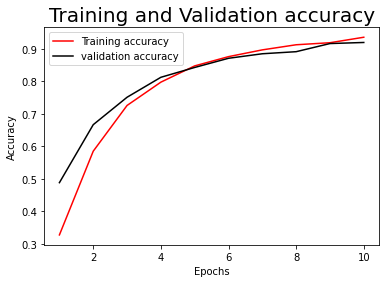

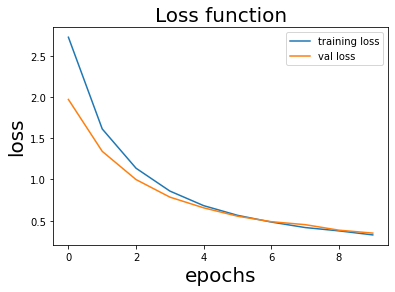

In [158]:
plot_generator(history_ANNmodel_2)

# CNN 2 layer 

In [57]:
CNNmodel_2layer = Sequential()
CNNmodel_2layer.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
CNNmodel_2layer.add(Flatten())
CNNmodel_2layer.add(Dense(43, activation='softmax'))
#Compilation of the model
CNNmodel_2layer.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 10
history_CNNmodel_2 = CNNmodel_2layer.fit(X_train, Y_train, batch_size=32, epochs=epochs, validation_data=(X_test, Y_test))
CNNmodel_2layer.save("CNNmodel_2layer.h5")


Epoch 1/10
981/981 [==============================] - 25s 24ms/step - loss: 1.6282 - accuracy: 0.5989 - val_loss: 0.4306 - val_accuracy: 0.8949
Epoch 2/10
981/981 [==============================] - 21s 21ms/step - loss: 0.2957 - accuracy: 0.9309 - val_loss: 0.2422 - val_accuracy: 0.9366
Epoch 3/10
981/981 [==============================] - 15s 16ms/step - loss: 0.1580 - accuracy: 0.9631 - val_loss: 0.1912 - val_accuracy: 0.9540
Epoch 4/10
981/981 [==============================] - 16s 16ms/step - loss: 0.1028 - accuracy: 0.9768 - val_loss: 0.1763 - val_accuracy: 0.9579
Epoch 5/10
981/981 [==============================] - 25s 25ms/step - loss: 0.0766 - accuracy: 0.9832 - val_loss: 0.1562 - val_accuracy: 0.9644
Epoch 6/10
981/981 [==============================] - 18s 19ms/step - loss: 0.0577 - accuracy: 0.9865 - val_loss: 0.1570 - val_accuracy: 0.9639
Epoch 7/10
981/981 [==============================] - 23s 24ms/step - loss: 0.0429 - accuracy: 0.9905 - val_loss: 0.1883 - val_accuracy:

In [30]:
CNNmodel_2Evaluation = CNNmodel_2layer.evaluate(X_test, Y_test)

246/246 [==============================] - 3s 11ms/step - loss: 0.1519 - accuracy: 0.9680


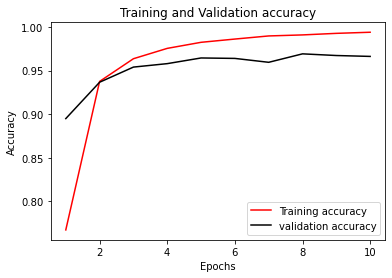

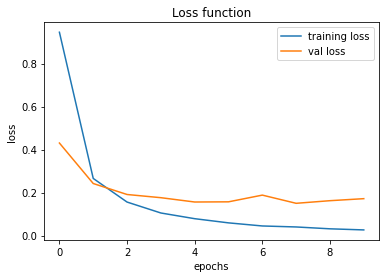

In [58]:
plot_generator(history_CNNmodel_2)


# CNN with three Layers

In [60]:
CNNmodel_3layer = Sequential()
CNNmodel_3layer.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
CNNmodel_3layer.add(Dense(25, activation='relu', input_shape=X_train.shape[1:]))
CNNmodel_3layer.add(Flatten())
CNNmodel_3layer.add(Dense(43, activation='softmax'))
#Compilation of the model
CNNmodel_3layer.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 10
history_CNNmodel_3 = CNNmodel_3layer.fit(X_train, Y_train, batch_size=32, epochs=epochs, validation_data=(X_test, Y_test))
CNNmodel_3layer.save("CNNmodel_3layer.h5")
CNNmodel_3Evaluation = CNNmodel_3layer.evaluate(X_test, Y_test)

Epoch 1/10
981/981 [==============================] - 41s 34ms/step - loss: 1.4342 - accuracy: 0.6366 - val_loss: 0.2209 - val_accuracy: 0.9411
Epoch 2/10
981/981 [==============================] - 29s 30ms/step - loss: 0.1487 - accuracy: 0.9636 - val_loss: 0.1470 - val_accuracy: 0.9652
Epoch 3/10
981/981 [==============================] - 27s 28ms/step - loss: 0.0702 - accuracy: 0.9838 - val_loss: 0.1179 - val_accuracy: 0.9753
Epoch 4/10
981/981 [==============================] - 25s 26ms/step - loss: 0.0385 - accuracy: 0.9900 - val_loss: 0.1465 - val_accuracy: 0.9644
Epoch 5/10
981/981 [==============================] - 35s 36ms/step - loss: 0.0266 - accuracy: 0.9932 - val_loss: 0.1417 - val_accuracy: 0.9676
Epoch 6/10
981/981 [==============================] - 33s 34ms/step - loss: 0.0249 - accuracy: 0.9931 - val_loss: 0.1069 - val_accuracy: 0.9804
Epoch 7/10
981/981 [==============================] - 34s 35ms/step - loss: 0.0134 - accuracy: 0.9968 - val_loss: 0.1195 - val_accuracy:

In [61]:
CNNmodel_3Evaluation = CNNmodel_3layer.evaluate(X_test, Y_test)

246/246 [==============================] - 4s 14ms/step - loss: 0.1049 - accuracy: 0.9800


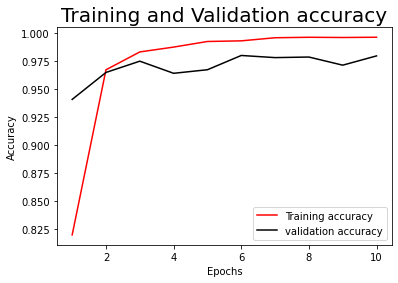

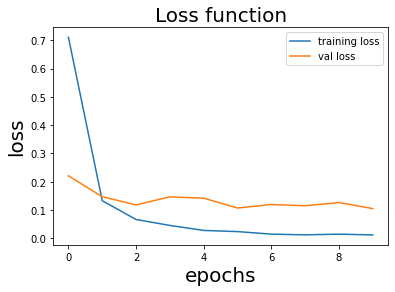

In [159]:
plot_generator(history_CNNmodel_3)

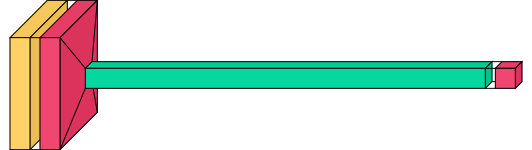

In [36]:
import visualkeras
visualkeras.layered_view(CNNmodel_3layer)

In [63]:
CNNmodel_3layer.save("CNNmodel_3layer.h5")

# Summary of Model accuracies

Text(0.5, 1.0, 'Accuracy and Loss results of Second CNN model with different strides')

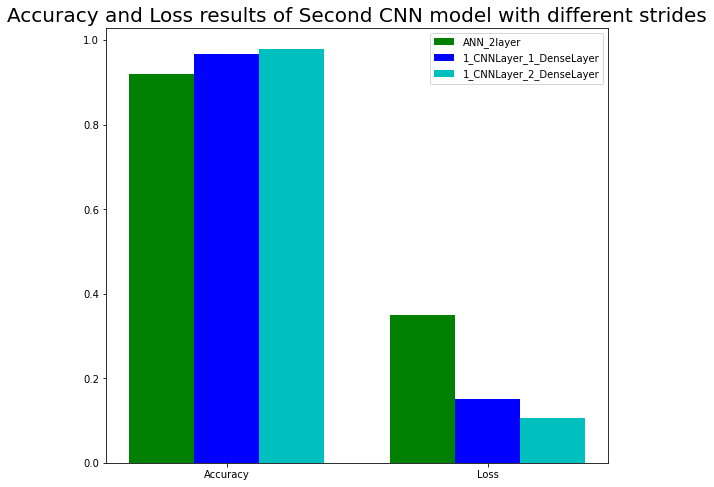

In [161]:
#Bar graph
barWidth = 0.25
fig = plt.subplots(figsize =(9, 8))

model_1 = [ANNmodel_2Evaluation[1], ANNmodel_2Evaluation[0]]
model_2 = [CNNmodel_2Evaluation[1], CNNmodel_2Evaluation[0]]
model_3 = [CNNmodel_3Evaluation[1], CNNmodel_3Evaluation[0]]

bar1 = np.arange(len(model_1))
bar2 = [i + barWidth for i in bar1]
bar3 = [i + barWidth for i in bar2]

plt.bar(bar1, model_1, color ='g', width = barWidth, label ='ANN_2layer') 
plt.bar(bar2, model_2, color ='b', width = barWidth, label ='1_CNNLayer_1_DenseLayer')
plt.bar(bar3, model_3, color ='c', width = barWidth, label ='1_CNNLayer_2_DenseLayer')

plt.xticks([r + barWidth for r in range(len(model_1))],  ['Accuracy', 'Loss'])

plt.legend()
plt.title("Accuracy and Loss results of Second CNN model with different strides",fontsize = 20)

# Load saved model

In [67]:
import os
os.chdir(r'D:\Traffic_Sign_Recognition')
from tensorflow.keras.models import load_model 

model = load_model ('./training/CNNmodel_3layer.h5')

In [69]:
#dictionary to label all traffic signs class.
classes = { 0:'Speed limit (20 km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'Do Not Enter', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals ahead', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [105]:
from PIL import Image 
import numpy as np 
import matplotlib.pyplot as plt 

test_path="D:\Traffic_Sign_Recognition\Test.csv"
data=[] # for Test image values
for i in imgs:
        
    image = Image.open("D:\Traffic_Sign_Recognition" + '\\'+ i)
    image = image.resize((30,30))
    image = np.array(image)
    data.append(image)
    
X_pred = np.array(data)
X_pred = X_pred/255

pred = model.predict_classes(X_pred)  

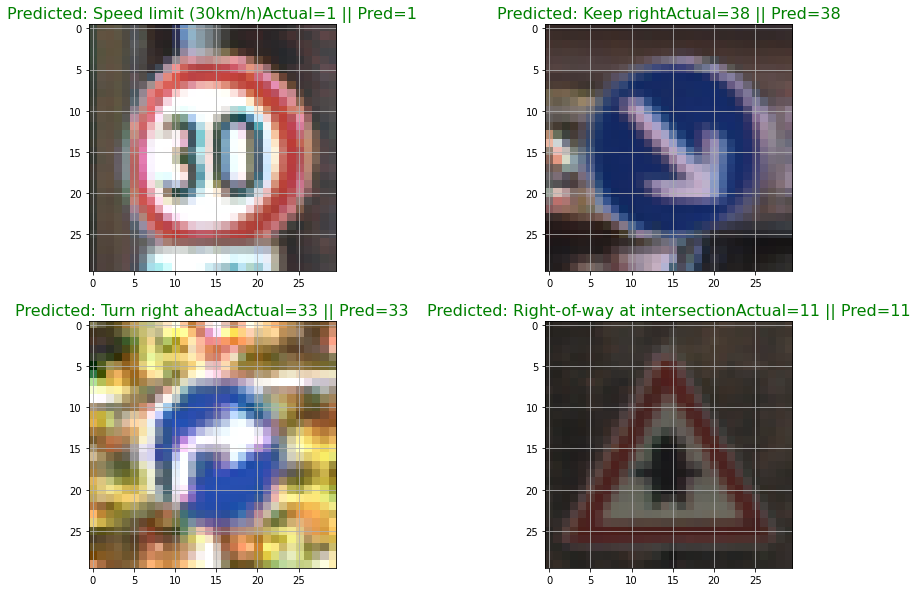

In [174]:
rand_index=randint(0,15)
plt.figure(figsize = (15, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.grid(True)
    Color = 'g' # Prints in green if Coorect prediction
    if ls[i+rand_index] !=pred[i+rand_index]:
        Color = 'r'  # Print in red if wrong prediction
    plt.title("Predicted: "+str(classes[pred[i+rand_index]]+'Actual={} || Pred={}'.format(ls[i+rand_index],pred[i+rand_index])), color = Color, fontsize = 16)
    plt.imshow(X_pred[i+rand_index])
plt.show()

In [ ]:
r